# Data Anlysis and Exploration

## Utilizing Data From:
 - Box Office Mojo
 - Twitter

### Import Libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataframe and get some high level information

In [180]:
df = pd.read_csv("../data/Mojo_Plus_IMDB_Data.csv").drop(['Unnamed: 0', 'Unnamed: 0_y'], axis=1)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Title                             4539 non-null   object 
 1   Gross                             4539 non-null   float64
 2   Max_Theaters                      4539 non-null   int64  
 3   Opening_Weekend_Theaters          4539 non-null   int64  
 4   Opening_Weekend_Gross             4539 non-null   float64
 5   Opening_Weekend_Percent_of_Gross  4539 non-null   float64
 6   Distributor                       4539 non-null   object 
 7   Genres                            4491 non-null   object 
 8   Rating                            2265 non-null   object 
 9   Runtime                           4539 non-null   int64  
 10  Date                              4539 non-null   object 
 11  title_lowercase                   4539 non-null   object 
 12  genre_

As we can see above, the columns that were merged in from IMDB have many missing values. This means that we could not find the movies we scraped from box office mojo in the IMDB dataset. This is likely due to nomenclature differences between the two sources in the title, and since we did not have the IMDB movie_ID, we had to creatively merge using the title. Still, 2388 movies is enough data to work with, and so when we analyze those columns we will be sure to analyze on this 2388 item subset dataframe.

In [375]:
df.describe()

,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Runtime,id,popularity,vote_average,vote_count
count,4.539000e+03,4539.000000,4539.000000,4.539000e+03,4539.000000,4539.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,1.600509e+07,686.857017,576.050892,4.753036e+06,28.262349,103.364397,348723.706030,7.968111,6.347362,892.041457
std,5.748640e+07,1197.374564,1178.289418,1.846196e+07,25.038489,38.567968,101900.486263,7.786335,1.277319,2017.303227
min,7.400000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,239.000000,0.600000,0.000000,1.000000
25%,2.586850e+04,7.000000,1.000000,4.169000e+03,5.500000,91.000000,291856.750000,1.887750,5.700000,9.750000
50%,1.774040e+05,40.000000,4.000000,2.208300e+04,25.300000,101.000000,352197.000000,6.471000,6.400000,86.000000
75%,2.597054e+06,648.000000,265.000000,3.641930e+05,44.100000,115.000000,422067.500000,10.982500,7.100000,688.000000
max,9.366622e+08,4802.000000,4725.000000,3.571150e+08,189.100000,1179.000000,602984.000000,80.773000,10.000000,20175.000000


In [182]:
df.head(3)

,Title,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Distributor,Genres,Rating,Runtime,...,title_lowercase,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,The Woman in Black 2: Angel of Death,26501323.0,2602,2602,15027415.0,56.7,Relativity Media,"['Drama', 'Horror', 'Thriller']",PG-13,98,...,thewomaninblack2:angelofdeath,"[53, 27, 18]",288158.0,en,The Woman in Black 2: Angel of Death,10.240,2015-01-02,The Woman in Black 2: Angel of Death,5.1,627.0
1,The Search for General Tso,54275.0,13,2,9336.0,17.2,IFC Films,"['Comedy', 'Documentary', 'History', 'Mystery']",NaN,71,...,thesearchforgeneraltso,[99],261041.0,en,The Search for General Tso,1.404,2014-04-20,The Search for General Tso,6.7,31.0
2,The Taking of Tiger Mountain,228984.0,13,7,50621.0,22.1,Well Go USA Entertainment,"['Action', 'Adventure', 'Biography', 'History'...",NaN,141,...,thetakingoftigermountain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[[1.         0.67031458]
 [0.67031458 1.        ]]


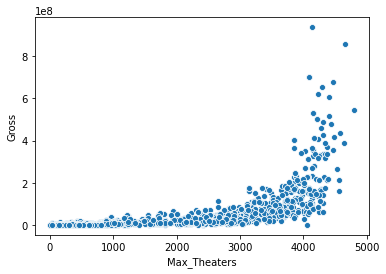

In [377]:
sns.scatterplot(data=df, x='Max_Theaters', y='Gross')
print(np.corrcoef(df['Max_Theaters'], df['Gross']))

In presentation, make some inferences as to why this is happening

In [184]:
genres = []

In [185]:
i = 0
for item in list(df['Genres']):
    if type(item) == str:
        list_item = item.strip('[\']').split('\', \'')
        genres = genres + list_item
        i += 1
    else:
        continue
    
genres = list(set(genres))    

In [188]:
df_genres = df[['Title', 'Gross', 'Genres']].copy()

In [189]:

null_genres_index = df_genres[df_genres['Genres'].isna() == True].index
df_genres.drop(null_genres_index, inplace=True)

for genre in genres:
    df_genres[genre] = df_genres['Genres'].apply(lambda x: 1 if genre in x else 0)



In [323]:
df_genres[['Gross', 'Comedy']].groupby('Comedy').mean().iloc[0][0]

13774140.0210021

In [327]:
gross_by_genre = []
for genre in genres:
    gross = df_genres[['Gross', genre]].groupby(genre).mean().iloc[1][0]
    gross_by_genre.append({
        'Genre': genre,
        'Gross': gross
        })

In [328]:
genre_gross_df = pd.DataFrame(gross_by_genre)

I have a feeling adventure/scifi are inflated from Marvel


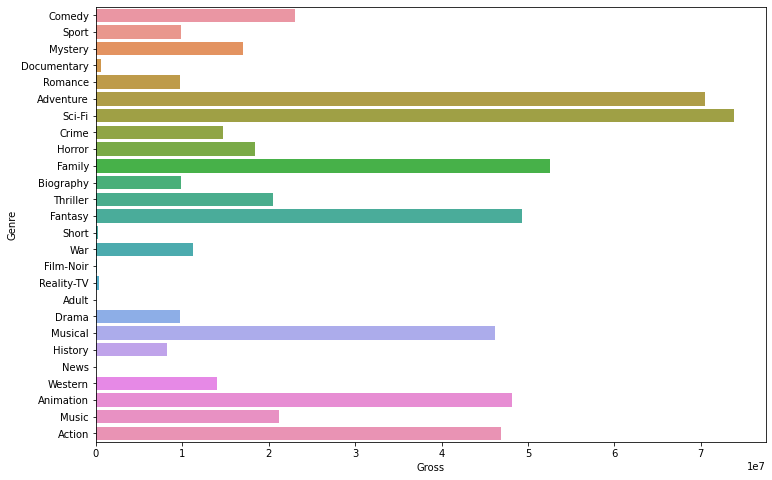

In [329]:
plt.figure(figsize=(12,8))
sns.barplot(y='Genre', x='Gross', data=genre_gross_df)
print("I have a feeling adventure/scifi are inflated from Marvel")

In [263]:
twitter_df = pd.read_csv('../data/twitter_movies_2020.csv') # TRY MERGING GROSS

In [264]:
twitter_df.head()

,Unnamed: 0,Movie,Likes,Retweets,Replies
0,0,Three Christs,1,0,0
1,1,The Grudge,2,0,0
2,2,Advocate,14036,5755,216
3,3,Doctor Who Live Q&A And Screening,14036,5755,216
4,4,Mystify: Michael Hutchence,1495,475,112


In [265]:
df['Title_LC'] = df['Title'].apply(lambda x: x.lower().replace(" ",""))
twitter_df['Title_LC'] = twitter_df['Movie'].apply(lambda x: x.lower().replace(" ",""))

In [266]:
twitter_df = twitter_df.merge(df[['Title_LC', 'Opening_Weekend_Gross']], 
                              how='left', on='Title_LC').drop(['Unnamed: 0', 'Title_LC'], axis=1)

In [286]:
df_genres['Title_LC'] = df_genres['Title'].apply(lambda x: x.lower().replace(" ",""))
twitter_df['Title_LC'] = twitter_df['Movie'].apply(lambda x: x.lower().replace(" ",""))

In [289]:
twitter_df = twitter_df.merge(df_genres, how='left', on='Title_LC')

In [304]:
twitter_df[['Likes', 'Comedy']].groupby('Comedy').sum().iloc[1][0]

118822

In [308]:
twitter_df[['Likes', 'Comedy']].groupby('Comedy').sum().iloc[1][0]

118822

In [322]:
twitter_df[['Likes', 'Film-Noir']].groupby('Film-Noir').sum()

,Likes
Film-Noir,
0.0,407554


In [386]:
twitter_by_genre = []
for i, genre in enumerate(genres):
    
    # if no values for that genre, we just add zero
    try:
        likes = twitter_df[['Likes', genre]].groupby(genre).mean().iloc[1][0]
    except: 
        likes = 0
    try:   
        retweets = twitter_df[['Retweets', genre]].groupby(genre).mean().iloc[1][0]
    except:    
        retweets = 0
    try:   
        replies = twitter_df[['Replies', genre]].groupby(genre).mean().iloc[1][0]
    except:
        replies = 0
        
    twitter_by_genre.append({
        'Genre': genre,
        'Average Likes': likes,
        'Average Retweets': retweets,
        'Average Replies': replies
        })

In [387]:
twitter_genre_df = pd.DataFrame(twitter_by_genre)

In [388]:
twitter_genre_df.head()

,Genre,Average Likes,Average Retweets,Average Replies
0,Comedy,2285.038462,710.423077,89.557692
1,Sport,14864.500000,1472.000000,276.750000
2,Mystery,240.285714,80.666667,11.761905
3,Documentary,1277.578947,456.421053,42.789474
4,Romance,2081.625000,743.781250,55.062500


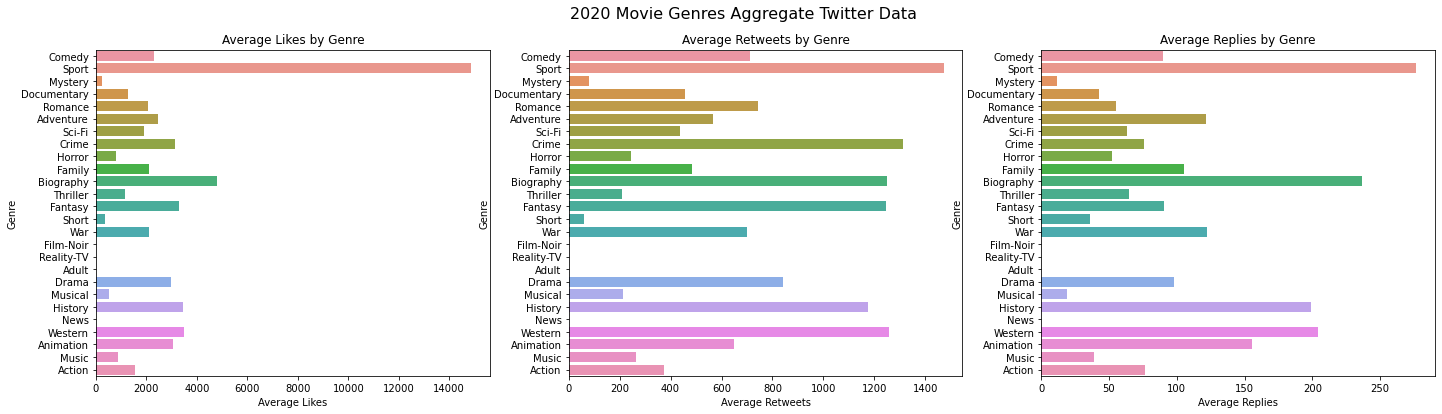

In [390]:
new_figure = plt.figure(figsize=(24,6))
new_figure.suptitle('2020 Movie Genres Aggregate Twitter Data', fontsize=16)

ax1 = new_figure.add_subplot(131)
ax1.set_title('Average Likes by Genre')
sns.barplot(y='Genre', x='Average Likes', data=twitter_genre_df, ax=ax1)

ax2 = new_figure.add_subplot(132)
ax2.set_title('Average Retweets by Genre')
sns.barplot(y='Genre', x='Average Retweets', data=twitter_genre_df, ax=ax2)

ax3 = new_figure.add_subplot(133)
ax3.set_title('Average Replies by Genre')
sns.barplot(y='Genre', x='Average Replies', data=twitter_genre_df, ax=ax3)
new_figure.savefig('/Users/brianmccabe/Desktop/Twitter_Genre_Averages')